In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


train_path = 'D:/CatractImagesMobileNet/cataract/CGN-DataSet/Training-dataset/'
valid_path = 'D:/CatractImagesMobileNet/cataract/CGN-DataSet/Test-Dataset/'

# add preprocessing layer to the front of VGG
mbnt = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [3]:
import xlsxwriter
workbook = xlsxwriter.Workbook('D:/CatractImagesMobileNet/cataract/files/MobileNetCatractImagesAnalysis.xlsx')
worksheet1 = workbook.add_worksheet()
row=0
col=0
imageCount=0
worksheet1.write(row, 0, str("Analysis of Image"))
worksheet1.write(row, 1, str("Actual Object"))
worksheet1.write(row, 2, str("Percentage for Detected Object"))
worksheet1.write(row, 3, str("Detected Object"))
import os

row=1
for path, currentDirectory, files in os.walk("D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset"):
    for file in files:
        print(os.path.join(path, file))
        imageCount=imageCount + 1
        worksheet1.write(row, 0, str("Image-" + str(imageCount)))
        row=row+1
        

D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_061.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_062.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_063.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_064.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_065.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_066.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_067.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_068.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_069.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_070.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Dataset\cataract\cataract_071.png
D:\CatractImagesMobileNet\cataract\CGN-DataSet\Test-Da

In [4]:
imageCount

60

In [5]:
# don't train existing weights
for layer in mbnt.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of classes
folders = glob('D:/CatractImagesMobileNet/cataract/CGN-DataSet/Training-dataset/*')
print(len(folders))

3


In [7]:
# our layers - you can add more if you want
x = Flatten()(mbnt.output)
x = Dense(200, activation='relu')(x)
x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
#prediction = Dense(1, activation='sigmoid')(x)


In [8]:
# create a model object
model = Model(inputs=mbnt.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
  
training_set = train_datagen.flow_from_directory('D:/CatractImagesMobileNet/cataract/CGN-DataSet/Training-dataset/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/CatractImagesMobileNet/cataract/CGN-DataSet/Test-Dataset/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [12]:
import os
cats=[]
cat=[]
for path, currentDirectory, files in os.walk("D:\CatractImagesMobileNet\cataract\CGN-DataSet\Training-dataset"):
    for file in files:
        #print(os.path.join(path, file))
        #print(file)
        cats=path.split("\\")
        cats=cats[len(cats)-1]
        if cats not in cat:
            cat.append(cats)
            print(cats)
cat.sort()
print(cat)

#images,cls = next(test_set)



cataract
glaucoma
normal
['cataract', 'glaucoma', 'normal']


In [13]:
#plt.imshow(images[3])
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [14]:
len(test_set)

2

In [15]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
4/4 [==============================] - 25s 6s/step - loss: 13.6290 - accuracy: 0.3000 - val_loss: 7.8333 - val_accuracy: 0.4500
Epoch 2/20
4/4 [==============================] - 16s 4s/step - loss: 5.9200 - accuracy: 0.6417 - val_loss: 5.3215 - val_accuracy: 0.5167
Epoch 3/20
4/4 [==============================] - 16s 4s/step - loss: 4.8376 - accuracy: 0.5750 - val_loss: 2.9280 - val_accuracy: 0.5500
Epoch 4/20
4/4 [==============================] - 17s 4s/step - loss: 3.6727 - accuracy: 0.5417 - val_loss: 1.9257 - val_accuracy: 0.6667
Epoch 5/20
4/4 [==============================] - 17s 4s/step - loss: 1.7416 - accuracy: 0.7333 - val_loss: 2.1650 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 17s 4s/step - loss: 1.3887 - accuracy: 0.7583 - val_loss: 1.3179 - val_accuracy: 0.7667
Epoch 7/20
4/4 [==============================] - 19s 5s/step - loss: 0.7784 - accuracy: 0.8500 - val_loss: 1.3988 - val_accuracy: 0.7667
Epoch 8/20
4/4 [=================

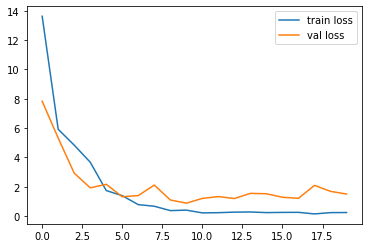

In [16]:
# loss
#import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

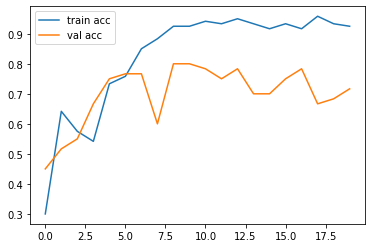

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [18]:
a, acc = model.evaluate(test_set)
print(acc)
print(a)

2/2 [==============================] - 3s 1s/step - loss: 1.5025 - accuracy: 0.7167
0.7166666388511658
1.5024638175964355


In [19]:
model.save("D:/CatractImagesMobileNet/cataract/Mobile114Model.h4")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:/CatractImagesMobileNet/cataract/Mobile114Model.h4\assets


In [20]:
test_set = test_datagen.flow_from_directory("D:\CatractImagesMobileNet\cataract\CGN-DataSet\\Test-Dataset",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)
     

Found 60 images belonging to 3 classes.
[[3.63780237e-05 5.21108091e-01 4.78855550e-01]
 [5.52002201e-03 2.82542489e-04 9.94197369e-01]
 [9.89362419e-01 4.58068307e-03 6.05681445e-03]
 [2.85679795e-04 9.51779842e-01 4.79343869e-02]
 [8.23164284e-02 8.96464467e-01 2.12190598e-02]
 [1.05659815e-03 1.15936964e-05 9.98931825e-01]
 [3.21126990e-02 1.04400478e-05 9.67876852e-01]
 [2.43800431e-01 7.53391385e-01 2.80812546e-03]
 [8.06769549e-08 1.57171413e-02 9.84282792e-01]
 [4.90727872e-01 2.85925001e-01 2.23347068e-01]
 [1.34732801e-07 6.95432425e-01 3.04567337e-01]
 [1.43148252e-04 9.02810156e-01 9.70466956e-02]
 [4.12684221e-06 6.37313902e-01 3.62681985e-01]
 [8.08738768e-02 3.62499766e-02 8.82876158e-01]
 [2.50763255e-09 1.40831843e-02 9.85916793e-01]
 [1.58520252e-05 2.35739723e-03 9.97626722e-01]
 [4.85670000e-07 1.05220136e-06 9.99998450e-01]
 [9.40695927e-02 3.26917856e-03 9.02661264e-01]
 [1.10332493e-03 4.33765948e-02 9.55520034e-01]
 [3.65442730e-07 4.57687347e-05 9.99953866e-01]


In [21]:
test_set = test_datagen.flow_from_directory("D:\CatractImagesMobileNet\cataract\CatractDataset\\TestCGN",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)
     

Found 3 images belonging to 1 classes.
[[8.2315728e-02 8.9646542e-01 2.1218920e-02]
 [1.0000000e+00 4.6132187e-17 7.7960607e-09]
 [8.0872782e-02 3.6249526e-02 8.8287771e-01]]


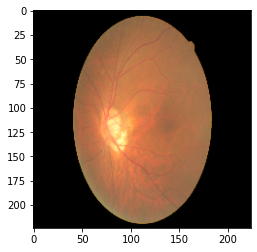

In [22]:
images,cls = next(test_set)
plt.imshow(images[0])

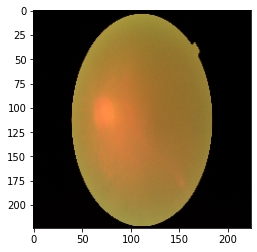

In [23]:
plt.imshow(images[1])

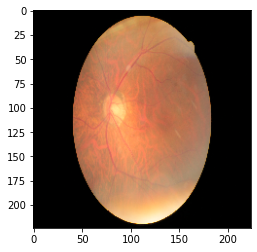

In [24]:
plt.imshow(images[2])

1 Actual: normal
File: cataract\cataract_061.png
1predicted: normal
[0. 1.]
[2.3513030411592695e-10, 1.0]
1 Actual: normal
File: cataract\cataract_062.png
0predicted: cataract
[0. 1.]
[1.0, 1.3782768743669878e-17]
1 Actual: normal
File: cataract\cataract_063.png
1predicted: normal
[0. 1.]
[8.489675976108835e-12, 1.0]
0 Actual: cataract
File: cataract\cataract_064.png
0predicted: cataract
[1. 0.]
[1.0, 1.0855814858157231e-10]
0 Actual: cataract
File: cataract\cataract_065.png
0predicted: cataract
[1. 0.]
[1.0, 9.090485586504826e-10]
0 Actual: cataract
File: cataract\cataract_066.png
1predicted: normal
[1. 0.]
[1.7081206783210734e-13, 1.0]
0 Actual: cataract
File: cataract\cataract_067.png
1predicted: normal
[1. 0.]
[6.351243420077424e-10, 1.0]
1 Actual: normal
File: cataract\cataract_068.png
0predicted: cataract
[0. 1.]
[1.0, 1.9556726016389803e-08]
1 Actual: normal
File: cataract\cataract_069.png
1predicted: normal
[0. 1.]
[0.0001455802412237972, 0.9998544454574585]
0 Actual: cataract


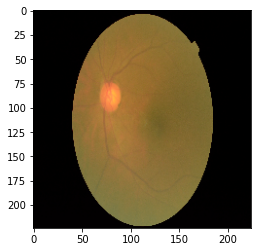

In [40]:
images,cls = next(test_set)
filename=test_set.filenames

#plt.imshow(images[0])
#print(cls[0])
#print(filename[0])
i=0
actual=[]
predicted=[]
for cl in cls:
    c=cl.tolist()
    max_value = max(c)
    max_index = c.index(max_value)
    print(str(max_index) + " Actual: " + cat[max_index])
    print("File: "  + filename[i])
    plt.imshow(images[i])
    actual.append(cat[max_index])
    
    pd=pred[i].tolist()
    m_value = max(pd)
    #print(max_value)
    m_index = pd.index(m_value)
    #print(max_index)
    print(str(m_index) + "predicted: " + cat[m_index])
    predicted.append(cat[m_index])
    print(cl)
    print(pd)
    plt.savefig('D:\\CatractImagesMobileNet\cataract\Predicted\Actual-' + str(cat[max_index]) + ' Predicted-' + str(cat[m_index])+ '-' + str(i) +'.png')
    i=i+1
    
#print(pd)
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()


[0. 1.]
cataract\cataract_062.png


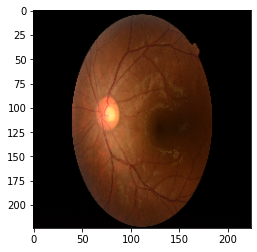

In [41]:
plt.imshow(images[1])
print(cls[1])
print(filename[1])


[0. 1.]
cataract\cataract_063.png


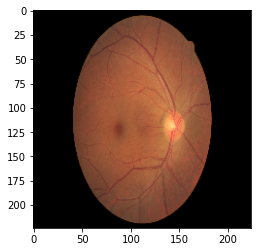

In [42]:
plt.imshow(images[2])
print(cls[2])
print(filename[2])

[1. 0.]
cataract\cataract_064.png


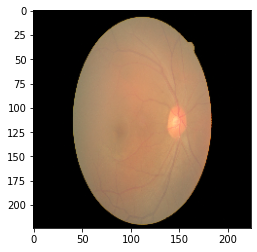

In [43]:
plt.imshow(images[3])
print(cls[3])
print(filename[3])

In [44]:
actual

['normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract']

In [45]:
predicted=[]
pre=pred.tolist()
for pd in pre:
    max_value = max(pd)
    print(pd)
    #print(max_value)
    max_index = pd.index(max_value)
    #print(max_index)
    print(str(max_index) + "predicted: " + cat[max_index])
    predicted.append(cat[max_index])

[2.3513030411592695e-10, 1.0]
1predicted: normal
[1.0, 1.3782768743669878e-17]
0predicted: cataract
[8.489675976108835e-12, 1.0]
1predicted: normal
[1.0, 1.0855814858157231e-10]
0predicted: cataract
[1.0, 9.090485586504826e-10]
0predicted: cataract
[1.7081206783210734e-13, 1.0]
1predicted: normal
[6.351243420077424e-10, 1.0]
1predicted: normal
[1.0, 1.9556726016389803e-08]
0predicted: cataract
[0.0001455802412237972, 0.9998544454574585]
1predicted: normal
[0.4128796458244324, 0.5871203541755676]
1predicted: normal
[0.9999983310699463, 1.6746082565077813e-06]
0predicted: cataract
[1.0, 2.5433073493749322e-20]
0predicted: cataract
[5.715815597521698e-14, 1.0]
1predicted: normal
[1.0, 7.950397007405741e-10]
0predicted: cataract
[0.9975115060806274, 0.002488471334800124]
0predicted: cataract
[0.9999977350234985, 2.309440105818794e-06]
0predicted: cataract
[1.0, 1.683211348080249e-09]
0predicted: cataract
[2.744314784390641e-18, 1.0]
1predicted: normal
[1.0, 3.723029384783416e-10]
0predicte

In [46]:
len(actual)

40

In [47]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

    cataract       0.50      0.55      0.52        20
      normal       0.50      0.45      0.47        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40



In [208]:
#for file in test_set.filenames:
 #   print(file)

In [210]:


#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [20]:
#for t in test_set:
 #   print(t)

In [24]:
actual=[]
img=1
row=1
for i in range(int(imageCount/8)):
    images,cls = next(test_set)
    print(len(cls))
    #print("In in first batch at 3")
    j=0
    for c in cls:
        cl=c.tolist()
        m_value = max(cl)
        m_index = cl.index(m_value)
        print("Index" + str(m_index))
        print("Actual: " + cat[m_index])
        print("class", cl)
        actual.append(cat[m_index])
        worksheet1.write(row, 1, str(cat[m_index]))
        
        #plt.imshow(images[j])
        #plt.savefig("D:\\ImagesForCocoAssesment\\MobileNet\\TagsForInputImagesGeneratedByProgram\\" + str(img) + "-" + str(cat[m_index]) + ".png")
        img=img+1
        j=j+1
        row=row+1
    i=i+1
 


32
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.

In [72]:
workbook.close()    
    

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [227]:
actual

['cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'c

              precision    recall  f1-score   support

    cataract       1.00      1.00      1.00         2
      normal       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



32